In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing dataset
dataset = pd.read_csv('Data.csv')
# Goal is to retrieve whether purchase will happen based on Country,Age,Salary
# X represent - Metrics(Country,Age,Salary)
X = dataset.iloc[:,:-1].values

# Y represent - Dependent Variable which v need to retreive(Purchased)
Y = dataset.iloc[:,-1:].values

print(X)
print(Y)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]
[['No']
 ['Yes']
 ['No']
 ['No']
 ['Yes']
 ['Yes']
 ['No']
 ['Yes']
 ['No']
 ['Yes']]


# Filling missing data

In [3]:
# Filling missing data by average using scikit
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:,1:3]) # check missing value & computes mean value of the columns
X[:,1:3] = imputer.transform(X[:,1:3]) # uses a previously computed mean to transform/autoscale the data
print(X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


# Encoding Categorial data

## https://contactsunny.medium.com/label-encoder-vs-one-hot-encoder-in-machine-learning-3fc273365621

Actual Data: 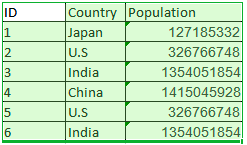 

**Label Encoder** - Use when we have binary(two) categorical data. EG: [Male,Female]. LabelEncoder encode labels with a value between 0 and n_classes. The problem here is since there are different numbers in the same column, the model will misunderstand the data to be in some kind of order, 0 < 1 <2(Japan < the US < India ).

   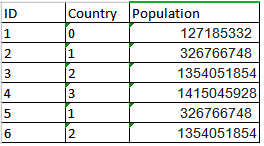

**One Hot Encoder** - What one hot encoding does is, it takes a column which has categorical data, which has been label encoded and then splits the column into multiple columns. The numbers are replaced by 1s and 0s, depending on which column has what value. In our example, we’ll get four new columns, one for each country — Japan, U.S, India, and China.

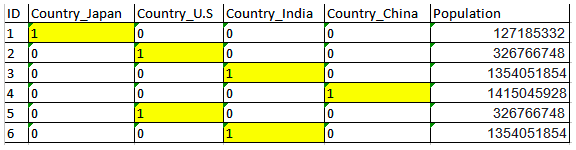

**When to use a Label Encoding vs. One Hot Encoding**

**We apply One-Hot Encoding when:**

- The categorical feature is not ordinal (like the countries above)
- The number of categorical features is less so one-hot encoding can be effectively applied

**We apply Label Encoding when:**

- The categorical feature is ordinal (like Jr. kg, Sr. kg, Primary school, high school)
- The number of categories is quite large as one-hot encoding can lead to high memory consumption

An ***ordinal variable*** is a clear ordering of the categories.  For example, suppose you have a variable, economic status, with three categories (low, medium and high)

# One Hot Encoding

In [4]:
# Encoding Categorial data - Independent Variable(Country,Age,Salary)
# Encoding independent variable(Country) since it isn't numeric
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# We need to transform only Country remaining column should be impacted. so passing  remainder='passthrough'
# This dummy variable will appear at start of array
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X)

[[1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 38.77777777777778 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


In [6]:
ct.transformers_

[('encoder', OneHotEncoder(), [0]), ('remainder', 'passthrough', [1, 2])]

In [7]:
dataset.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [17]:
ohe = OneHotEncoder(sparse=False)
sam = np.array(ohe.fit_transform(dataset[['Country']]))
print(sam)

ohe.categories_

[[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]


[array(['France', 'Germany', 'Spain'], dtype=object)]

# Label Encoding

In [5]:
#Encoding dependent variable
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Y = le.fit_transform(Y)
print(Y)

[0 1 0 0 1 1 0 1 0 1]


/home/vinoth/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


# Splitting training and test data set

In [16]:
# Splitting dataset to training set&test set.
from sklearn.model_selection import train_test_split
# 20% to test set in random row and 80% to training set.
# X_test & Y_test will map to same row. Same for training as well
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state =1)
print('X_train\n', X_train)
print('X_test\n', X_test)
print('Y_train\n', Y_train)
print('Y_test\n', Y_test)

X_train
 [[0.0 0.0 1.0 38.77777777777778 52000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 35.0 58000.0]]
X_test
 [[0.0 1.0 0.0 30.0 54000.0]
 [1.0 0.0 0.0 37.0 67000.0]]
Y_train
 [0 1 0 0 1 1 0 1]
Y_test
 [0 1]


# Feature Scaling

Using the transform method we can use the same mean and variance as it is calculated from our training data to transform our test data. 
Thus, the parameters learned by our model using the training data will help us to transform our test data. 
If we will use the fit method on our test data too, we will compute a new mean and variance that is a new scale for each feature and will let our model learn about our test data too. 
https://towardsdatascience.com/what-and-why-behind-fit-transform-vs-transform-in-scikit-learn-78f915cf96fe

In [17]:
# Feature Scaling - x represents independent data set
# Standardisation--> x-mean(x)/standard deviation(x) --> Range (-3 to +3)
# Normalisation--> x-min(x)/max(x)-min(x) --> Range (0 to 1)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# we shouldn't standardize Country which is done in OneHotEncoder since it return range(-3 to +3), we will loose country
# Only apply standardisation to only numeric value
# fit-calculate means&SD, transform-transforming all the features using the respective mean and variance
X_train[:,3:]=sc.fit_transform(X_train[:,3:])
# X_test is future incoming data for which we need to predict dependent variable(Purchased column).
# we will only transform it. We need to use same scalar object(sc) as that of train 
#Using the transform method we can use the same mean and variance as it is calculated from our training data to transform our test data. 
#Thus, the parameters learned by our model using the training data will help us to transform our test data.
X_test[:,3:]=sc.transform(X_test[:,3:])
print('X_train\n', X_train)
print('X_test\n', X_test)

X_train
 [[0.0 0.0 1.0 -0.19159184384578545 -1.0781259408412425]
 [0.0 1.0 0.0 -0.014117293757057777 -0.07013167641635372]
 [1.0 0.0 0.0 0.566708506533324 0.633562432710455]
 [0.0 0.0 1.0 -0.30453019390224867 -0.30786617274297867]
 [0.0 0.0 1.0 -1.9018011447007988 -1.420463615551582]
 [1.0 0.0 0.0 1.1475343068237058 1.232653363453549]
 [0.0 1.0 0.0 1.4379472069688968 1.5749910381638885]
 [1.0 0.0 0.0 -0.7401495441200351 -0.5646194287757332]]
X_test
 [[0.0 1.0 0.0 -1.4661817944830124 -0.9069571034860727]
 [1.0 0.0 0.0 -0.44973664397484414 0.2056403393225306]]


### Column Transform - Pipeline - Performing multiple operation

## https://machinelearningmastery.com/columntransformer-for-numerical-and-categorical-data/

In [22]:
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/abalone.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [23]:
df.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64

In [36]:
X, y = df.iloc[:,:-1], df.iloc[:,-1:]

In [37]:
X.head()

,0,1,2,3,4,5,6,7
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [38]:
y.head()

,8
0,15
1,7
2,9
3,10
4,7


In [43]:
numerical_ix = X.select_dtypes(include=['int64', 'float64']).columns
categorical_ix = X.select_dtypes(include=['object', 'bool']).columns

In [44]:
numerical_ix, categorical_ix

(Int64Index([1, 2, 3, 4, 5, 6, 7], dtype='int64'),
 Int64Index([0], dtype='int64'))

In [48]:
from sklearn.preprocessing import MinMaxScaler
t = [('cat',OneHotEncoder(),categorical_ix), ('num',MinMaxScaler(),numerical_ix)]
col_transform = ColumnTransformer(transformers=t)

In [51]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

model = SVR(kernel='rbf',gamma='scale',C=100)
pipeline = Pipeline(steps=[('prep',col_transform),('m',model)])

cv = KFold(n_splits=10, shuffle=True, random_state=1)
# evaluate the pipeline using cross validation and calculate MAE
scores = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# convert MAE scores to positive values
scores = np.absolute(scores)
# summarize the model performance
print('MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))


MAE: 1.465 (0.047)


In [80]:
# Importing dataset
dataset = pd.read_csv('Data.csv')
# Goal is to retrieve whether purchase will happen based on Country,Age,Salary
# X represent - Metrics(Country,Age,Salary)
X = dataset.iloc[:,:-1]

X.head()

,Country,Age,Salary
0,France,44.0,72000.0
1,Spain,27.0,48000.0
2,Germany,30.0,54000.0
3,Spain,38.0,61000.0
4,Germany,40.0,NaN


In [63]:
print(type(dataset.isnull().sum()))
dataset.isnull().sum()

<class 'pandas.core.series.Series'>


Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

In [67]:
print(dataset['Salary'].sum(axis=0))

574000.0


In [57]:
print(dataset.columns)
dataset.columns.get_loc('Salary')

Index(['Country', 'Age', 'Salary', 'Purchased'], dtype='object')


2

In [81]:
t = [('encode', OneHotEncoder(),['Country']),
     ('imputer', SimpleImputer(strategy='median'), ['Salary'])]
ct = ColumnTransformer(t,remainder='passthrough')
X=ct.fit_transform(X)
X

array([[1.0e+00, 0.0e+00, 0.0e+00, 7.2e+04, 4.4e+01],
       [0.0e+00, 0.0e+00, 1.0e+00, 4.8e+04, 2.7e+01],
       [0.0e+00, 1.0e+00, 0.0e+00, 5.4e+04, 3.0e+01],
       [0.0e+00, 0.0e+00, 1.0e+00, 6.1e+04, 3.8e+01],
       [0.0e+00, 1.0e+00, 0.0e+00, 6.1e+04, 4.0e+01],
       [1.0e+00, 0.0e+00, 0.0e+00, 5.8e+04, 3.5e+01],
       [0.0e+00, 0.0e+00, 1.0e+00, 5.2e+04,     nan],
       [1.0e+00, 0.0e+00, 0.0e+00, 7.9e+04, 4.8e+01],
       [0.0e+00, 1.0e+00, 0.0e+00, 8.3e+04, 5.0e+01],
       [1.0e+00, 0.0e+00, 0.0e+00, 6.7e+04, 3.7e+01]])